In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank

import tifffile as tiff
import os
from utils.microsam_utils import process_images_in_batches
from natsort import natsorted


In [2]:
matplotlib.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


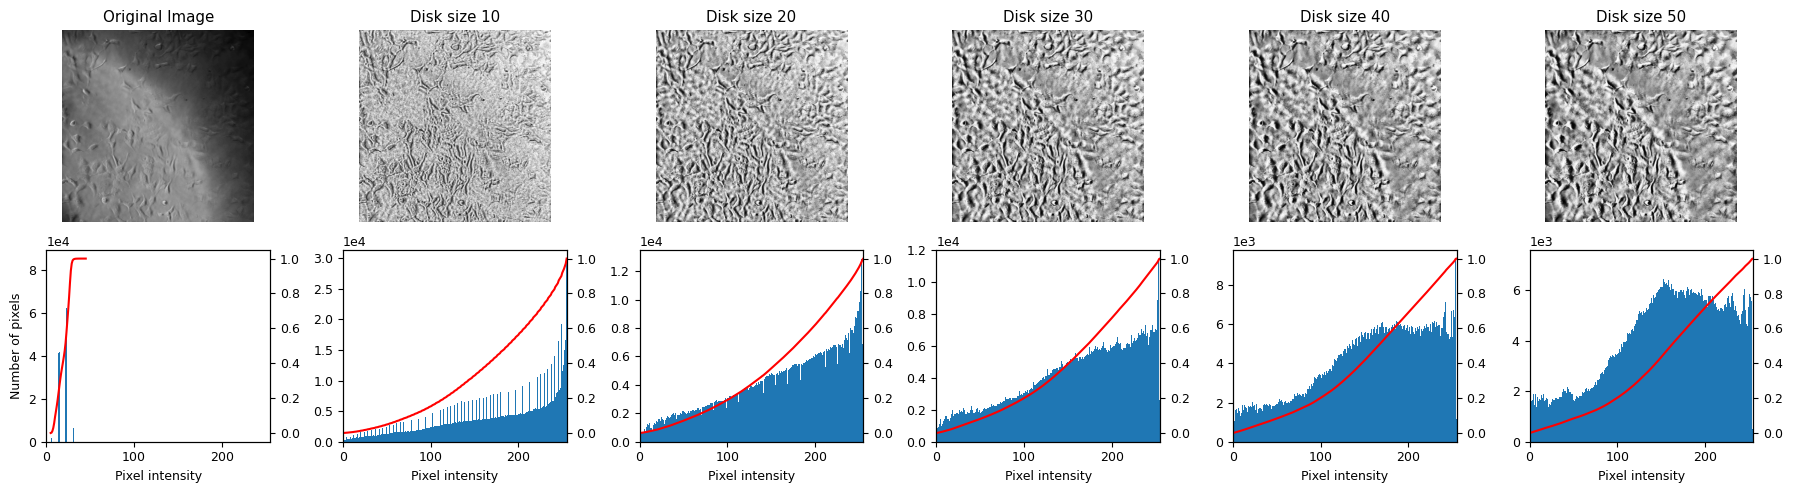

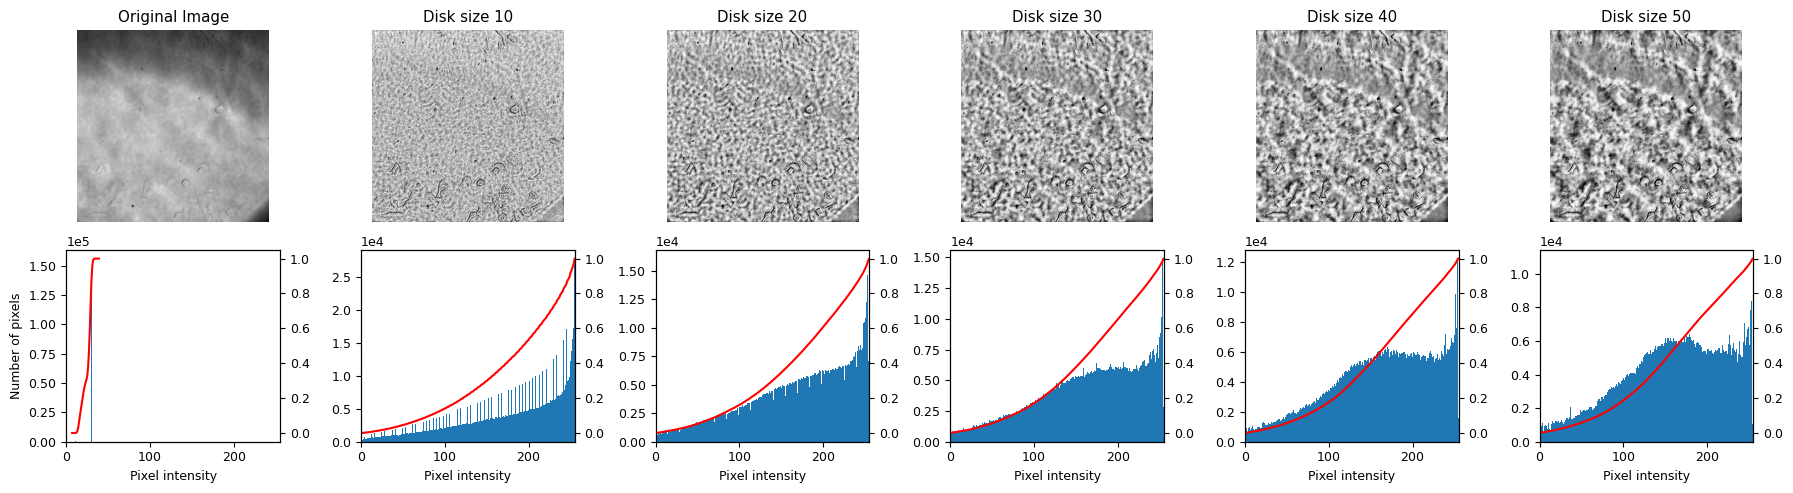

In [3]:
# Load images
img_dir = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/inhomogeneous_light_images'
img_files = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith('.tif') or f.endswith('.tiff')]

save_disk10_dir = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk10'
save_disk20_dir = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk20'
save_disk30_dir = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk30'
save_disk40_dir = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk40'
save_disk50_dir = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk50'

for img_path in img_files[:2]:
    # Convert from uint16 to uint8
    img = img_as_ubyte(tiff.imread(img_path))

    # Global equalise
    img_rescale = exposure.equalize_hist(img)

    # Local equalise - disk 10
    footprint = disk(10)
    img_eq_disk10 = rank.equalize(img, footprint=footprint)
    # tiff.imwrite(os.path.join(save_disk10_dir, os.path.basename(img_path)), img_eq_disk10.astype(np.uint16))

    # Local equalise - disk 20
    footprint = disk(20)
    img_eq_disk20 = rank.equalize(img, footprint=footprint)
    # tiff.imwrite(os.path.join(save_disk20_dir, os.path.basename(img_path)), img_eq_disk20.astype(np.uint16))

    # Local equalise - disk 30
    footprint = disk(30)
    img_eq_disk30 = rank.equalize(img, footprint=footprint)
    # tiff.imwrite(os.path.join(save_disk30_dir, os.path.basename(img_path)), img_eq_disk30.astype(np.uint16))

    # Local equalise - disk 40
    footprint = disk(40)
    img_eq_disk40 = rank.equalize(img, footprint=footprint)
    # tiff.imwrite(os.path.join(save_disk40_dir, os.path.basename(img_path)), img_eq_disk40.astype(np.uint16))

    # Local equalise - disk 50
    footprint = disk(50)
    img_eq_disk50 = rank.equalize(img, footprint=footprint)
    # tiff.imwrite(os.path.join(save_disk50_dir, os.path.basename(img_path)), img_eq_disk50.astype(np.uint16))


    #Display results (6 columns, 2 rows: top row for images, bottom row for histograms)
    fig, axes = plt.subplots(2, 6, figsize=(18, 5))  # Set figure size to accommodate all 6 columns and 2 rows

    # Plot original image and histogram
    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
    ax_img.set_title('Original Image')
    ax_hist.set_ylabel('Number of pixels')

    # Plot local equalization with disk sizes and their corresponding histograms
    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq_disk10, axes[:, 1])
    ax_img.set_title('Disk size 10')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq_disk20, axes[:, 2])
    ax_img.set_title('Disk size 20')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq_disk30, axes[:, 3])
    ax_img.set_title('Disk size 30')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq_disk40, axes[:, 4])
    ax_img.set_title('Disk size 40')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq_disk50, axes[:, 5])
    ax_img.set_title('Disk size 50')

    
    # Prevent overlap of y-axis labels
    plt.tight_layout()
    plt.show()



Now run combined jones script

In [4]:
# Get images
normal_images = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/inhomogeneous_light_images'
disk10_images = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk10'
disk20_images = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk20'
disk30_images = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk30'

disk50_images = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk50'

# Get masks
ground_truth = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/inhomogeneous_light_norm_labels'
normal_masks = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/normal_finetuned_vit_l_lm/Segmentation_Output'
disk10_masks = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk10_finetuned_vit_l_lm/Segmentation_Output'
disk20_masks = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk20_finetuned_vit_l_lm/Segmentation_Output'
disk30_masks = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk30_finetuned_vit_l_lm/Segmentation_Output'


# Get image suffixes
img_dir = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/inhomogeneous_light_images'
img_files = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith('.tif') or f.endswith('.tiff')]


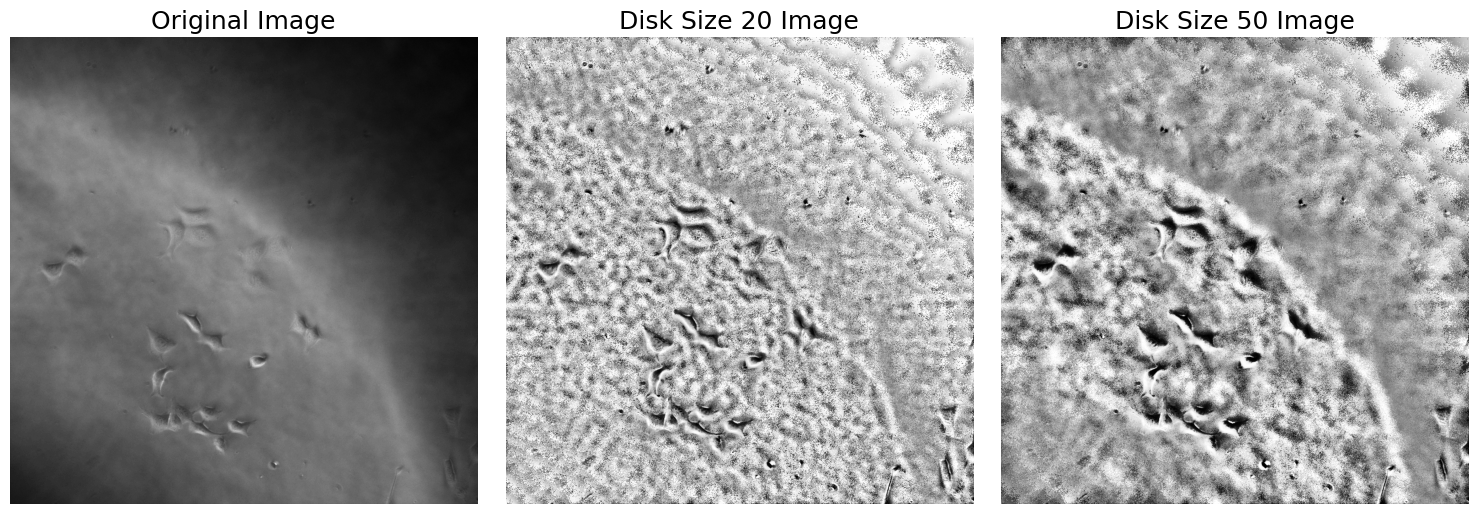

In [5]:

# Load image filenames
normal_images_dir = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/inhomogeneous_light_images'
disk20_images_dir = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk20'
disk50_images_dir = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/eval_test_data/inhomogeneous_light_exps/disk50'


img_files = natsorted([f for f in os.listdir(normal_images_dir) if f.endswith('.tif') or f.endswith('.tiff')])

i = 9
img_path = os.path.join(normal_images_dir, img_files[i])
img_disk20_path = os.path.join(disk20_images_dir, img_files[i])
img_disk50_path = os.path.join(disk50_images_dir, img_files[i])

# Load the images
img = tiff.imread(img_path)
img_eq_disk30 = tiff.imread(img_disk20_path)
img_eq_disk50 = tiff.imread(img_disk50_path)

# Plot the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

title_fontsize = 18


# Display images
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image', fontsize=title_fontsize)

axes[1].imshow(img_eq_disk30, cmap='gray')
axes[1].set_title('Disk Size 20 Image', fontsize=title_fontsize)

axes[2].imshow(img_eq_disk50, cmap='gray')
axes[2].set_title('Disk Size 50 Image', fontsize=title_fontsize)

# Hide axes for all images
for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()
